<a href="https://colab.research.google.com/github/DaoOfDreams/DAV_52/blob/main/DAV_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [96]:
filename_DL = '/content/DL_Complete_Yearly_Demand_Profile_train.csv'
def read_data(filename):
  df = pd.read_csv(filename)
  df = df.drop('Unnamed: 0',axis =1)
  return df

df = read_data(filename_DL)
df = df[['DateTime','Hourly Demand Met (in MW)']]
df.head()

,DateTime,Hourly Demand Met (in MW)
0,2022-01-01,2148.22
1,2022-01-01 01:00:00,1863.54
2,2022-01-01 02:00:00,1697.53
3,2022-01-01 03:00:00,1593.03
4,2022-01-01 04:00:00,1603.47


In [97]:
df = df.rename(columns={'DateTime': 'ds', 'Hourly Demand Met (in MW)': 'y'})
df['y'] = pd.to_numeric(df['y'], errors='coerce')

df['ds'] = pd.to_datetime(df['ds'],format='ISO8601')
# df['ds'] = df['ds'].dt.strftime('%Y-%m-%d')
df = df.set_index(['ds'])

df.head()

,y
ds,
2022-01-01 00:00:00,2148.22
2022-01-01 01:00:00,1863.54
2022-01-01 02:00:00,1697.53
2022-01-01 03:00:00,1593.03
2022-01-01 04:00:00,1603.47


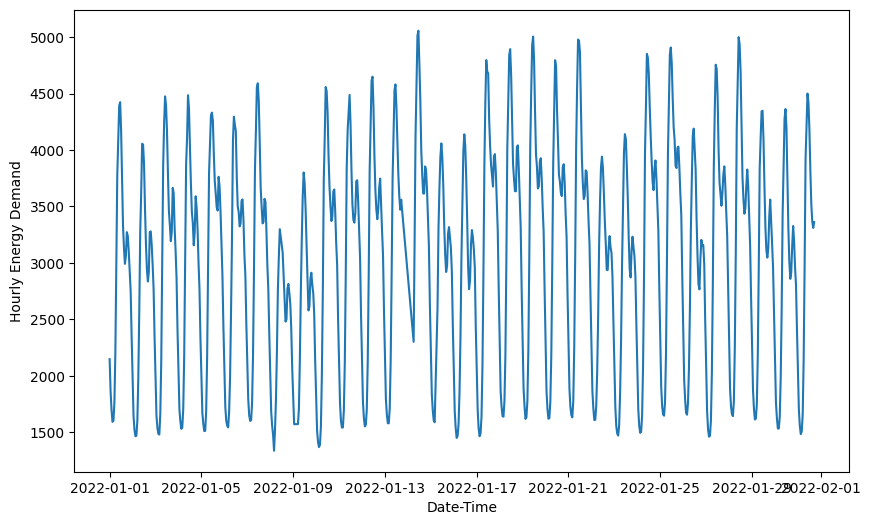

In [98]:
#Raw data
plt.xlabel("Date-Time")
plt.ylabel("Hourly Energy Demand")
plt.plot(df)

In [99]:
# Detecting Stationarity using Rolling Statistics
rollmean = df.rolling(window=12).mean()

rollstd = df.rolling(window=12).std()
print(rollmean, rollstd)

                               y
ds                              
2022-01-01 00:00:00          NaN
2022-01-01 01:00:00          NaN
2022-01-01 02:00:00          NaN
2022-01-01 03:00:00          NaN
2022-01-01 04:00:00          NaN
...                          ...
2022-01-31 13:00:00  3083.325000
2022-01-31 14:00:00  3252.950833
2022-01-31 15:00:00  3407.791667
2022-01-31 16:00:00  3545.355833
2022-01-31 17:00:00  3646.689167

[719 rows x 1 columns]                                y
ds                              
2022-01-01 00:00:00          NaN
2022-01-01 01:00:00          NaN
2022-01-01 02:00:00          NaN
2022-01-01 03:00:00          NaN
2022-01-01 04:00:00          NaN
...                          ...
2022-01-31 13:00:00  1221.299119
2022-01-31 14:00:00  1115.770750
2022-01-31 15:00:00   971.163237
2022-01-31 16:00:00   803.508945
2022-01-31 17:00:00   677.858279

[719 rows x 1 columns]


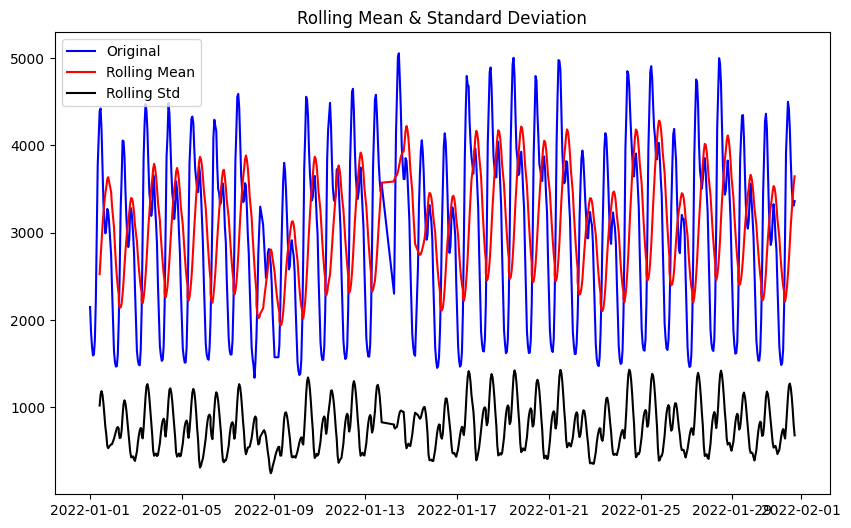

In [100]:
# Plot rolling statistics
orig = plt.plot(df, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [101]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(df['y'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '#Lags used', 'No. of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)' % key] = value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               -2.583597
p-value                       0.096435
#Lags used                   20.000000
No. of observations used    698.000000
Critical value (1%)          -3.439753
Critical value (5%)          -2.865690
Critical value (10%)         -2.568980
dtype: float64


In [102]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['y'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

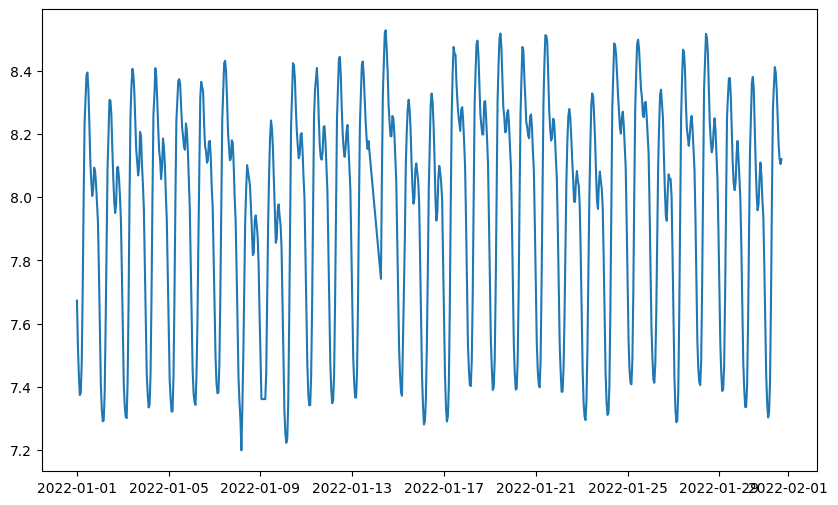

In [103]:
indexedDataset_logScale = np.log(df)
plt.plot(indexedDataset_logScale)

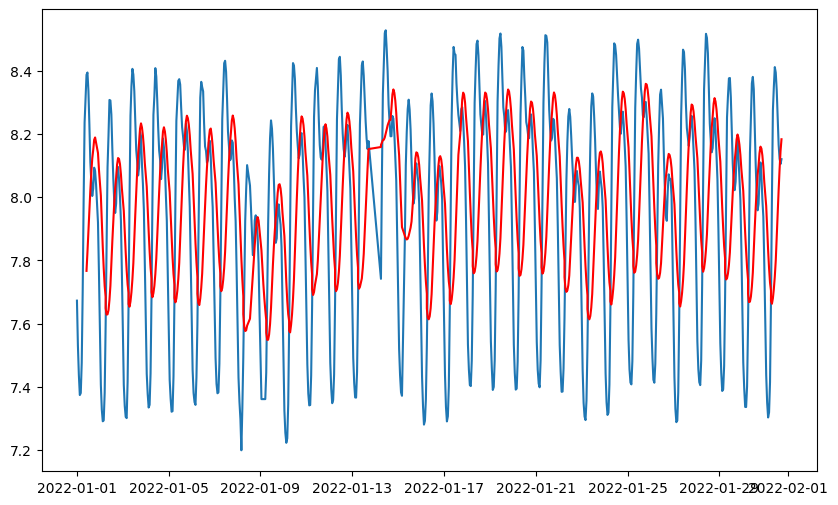

In [104]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [105]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,y
ds,
2022-01-01 00:00:00,NaN
2022-01-01 01:00:00,NaN
2022-01-01 02:00:00,NaN
2022-01-01 03:00:00,NaN
2022-01-01 04:00:00,NaN
2022-01-01 05:00:00,NaN
2022-01-01 06:00:00,NaN
2022-01-01 06:00:00,NaN
2022-01-01 07:00:00,NaN


In [106]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,y
ds,
2022-01-01 10:00:00,0.620868
2022-01-01 11:00:00,0.567916
2022-01-01 12:00:00,0.442938
2022-01-01 13:00:00,0.270920
2022-01-01 14:00:00,0.089268
2022-01-01 15:00:00,-0.027827
2022-01-01 16:00:00,-0.117743
2022-01-01 17:00:00,-0.121923
2022-01-01 18:00:00,-0.088202


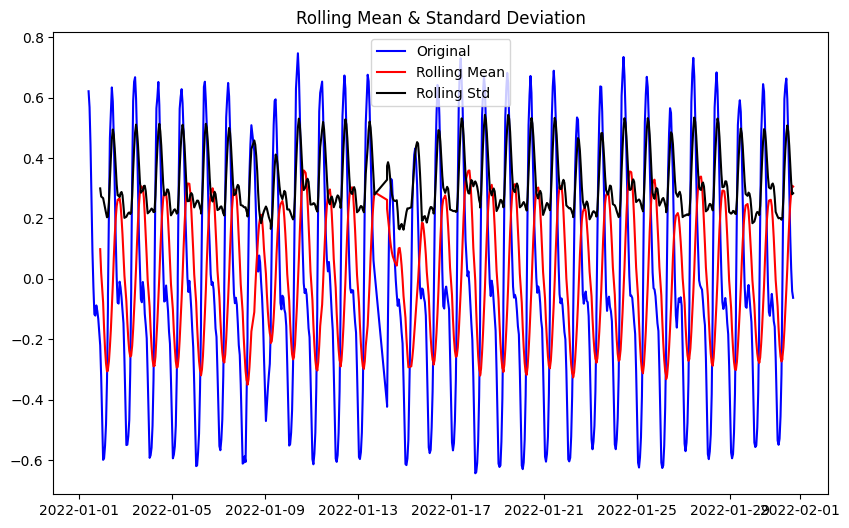

Results of Dickey Fuller Test
Test statistic             -6.585544e+00
p-value                     7.330571e-09
#Lags used                  2.000000e+01
No. of observations used    6.870000e+02
Critical value (1%)        -3.439904e+00
Critical value (5%)        -2.865756e+00
Critical value (10%)       -2.569015e+00
dtype: float64


In [107]:
test_stationarity(dataLogScaleMinusMovingAverage)

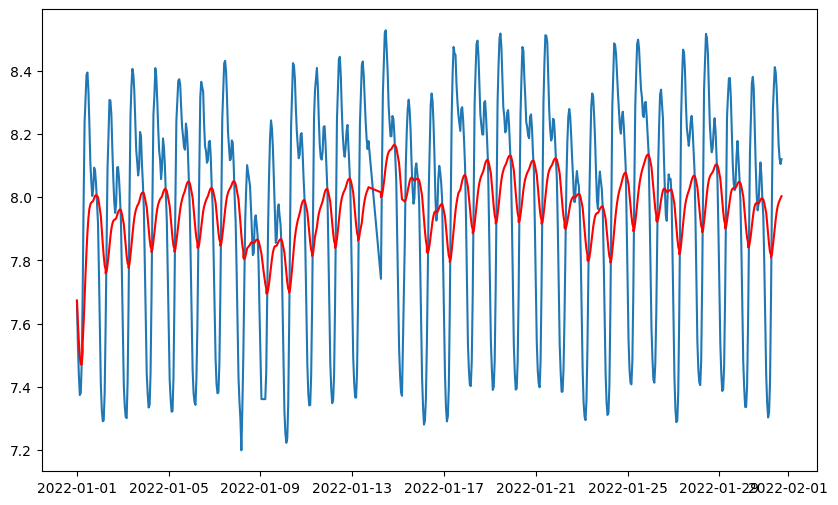

In [108]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [109]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

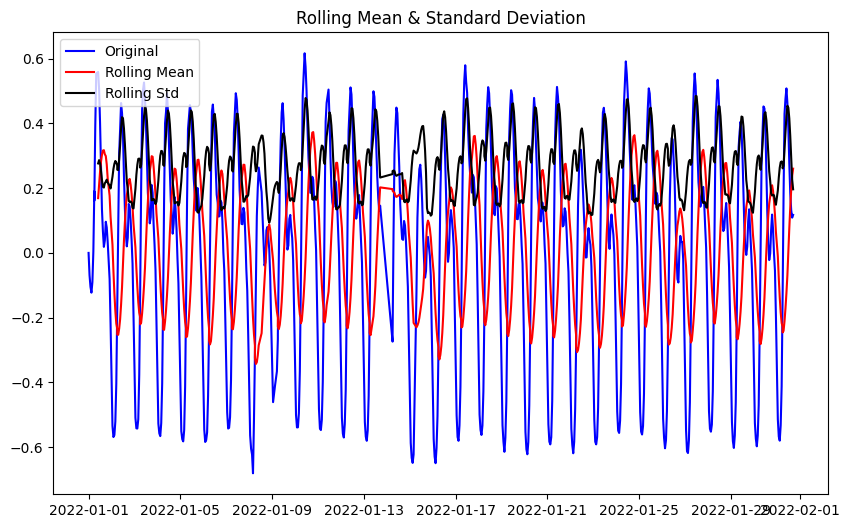

Results of Dickey Fuller Test
Test statistic               -4.834902
p-value                       0.000047
#Lags used                   20.000000
No. of observations used    698.000000
Critical value (1%)          -3.439753
Critical value (5%)          -2.865690
Critical value (10%)         -2.568980
dtype: float64


In [110]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

In [ ]:
decomposedLogData.describe()

In [ ]:
decomposedLogData.head(12)

AR
Plot the ADF and PACF graph

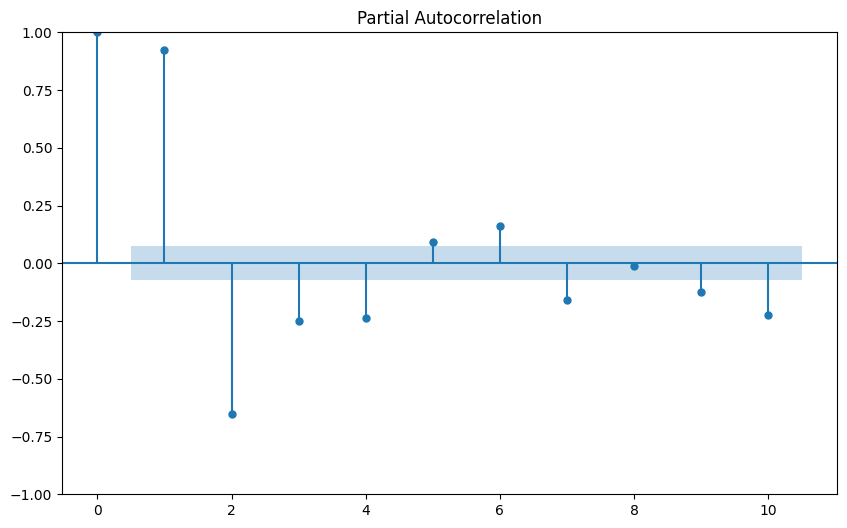

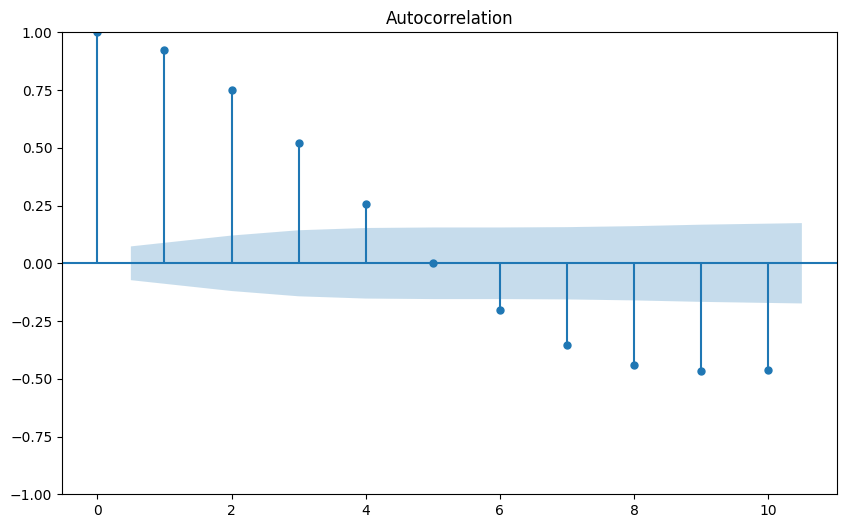

In [112]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

In [113]:
#Split the LogScale Data for Training & Testing
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

In [114]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [115]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  659
Model:                     AutoReg(1)   Log Likelihood                 410.851
Method:               Conditional MLE   S.D. of innovations              0.130
Date:                Thu, 04 Apr 2024   AIC                           -815.701
Time:                        10:15:07   BIC                           -802.233
Sample:                             1   HQIC                          -810.480
                                  659                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.718e-06      0.005     -0.002      0.999      -0.010       0.010
y.L1           0.9224      0.015     61.113      0.000       0.893       0.952
                                    Roots           

In [116]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [117]:
print(len(train))

659


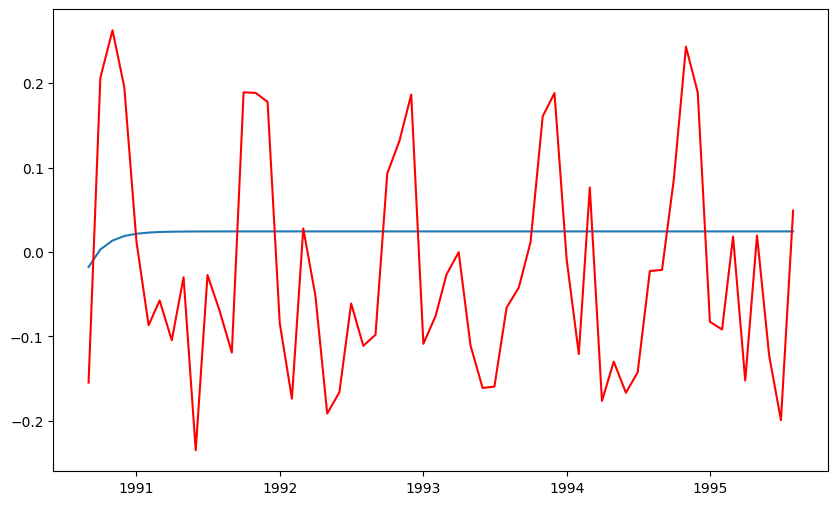

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.13744259577259288


In [ ]:
#Future Prediction
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
1995-10-01    0.024356
1995-11-01    0.024356
1995-12-01    0.024356
1996-01-01    0.024356
1996-02-01    0.024356
1996-03-01    0.024356
1996-04-01    0.024356
1996-05-01    0.024356
1996-06-01    0.024356
1996-07-01    0.024356
1996-08-01    0.024356
1996-09-01    0.024356
1996-10-01    0.024356
1996-11-01    0.024356
1996-12-01    0.024356
1997-01-01    0.024356
1997-02-01    0.024356
1997-03-01    0.024356
1997-04-01    0.024356
1997-05-01    0.024356
1997-06-01    0.024356
1997-07-01    0.024356
1997-08-01    0.024356
1997-09-01    0.024356
1997-10-01    0.024356
1997-11-01    0.024356
1997-12-01    0.024356
1998-01-01    0.024356
1998-02-01    0.024356
1998-03-01    0.024356
1998-04-01    0.024356
1998-05-01    0.024356
1998-06-01    0.024356
1998-07-01    0.024356
1998-08-01    0.024356
1998-09-01    0.024356
1998-10-01    0.024356
1998-11-01    0.024356
1998-12-01    0.024356
1999-01-01    0.024356
1999-02-01    0.024356
1999-03-01    0.024356
1999-0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## ARIMA Model

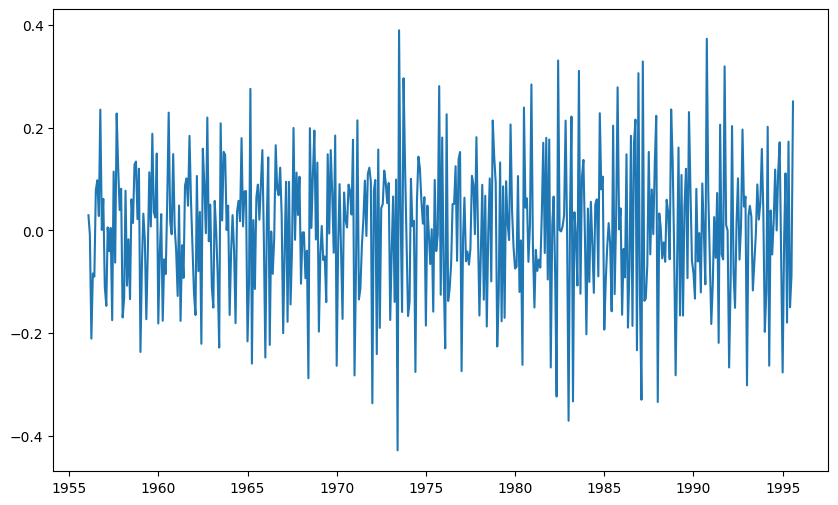

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

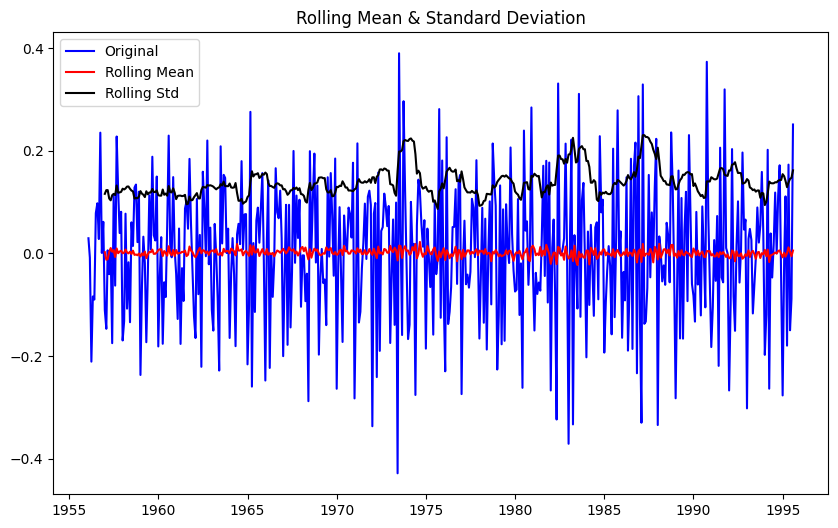

Results of Dickey Fuller Test
Test statistic               -4.869646
p-value                       0.000040
#Lags used                   18.000000
No. of observations used    456.000000
Critical value (1%)          -3.444772
Critical value (5%)          -2.867899
Critical value (10%)         -2.570157
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

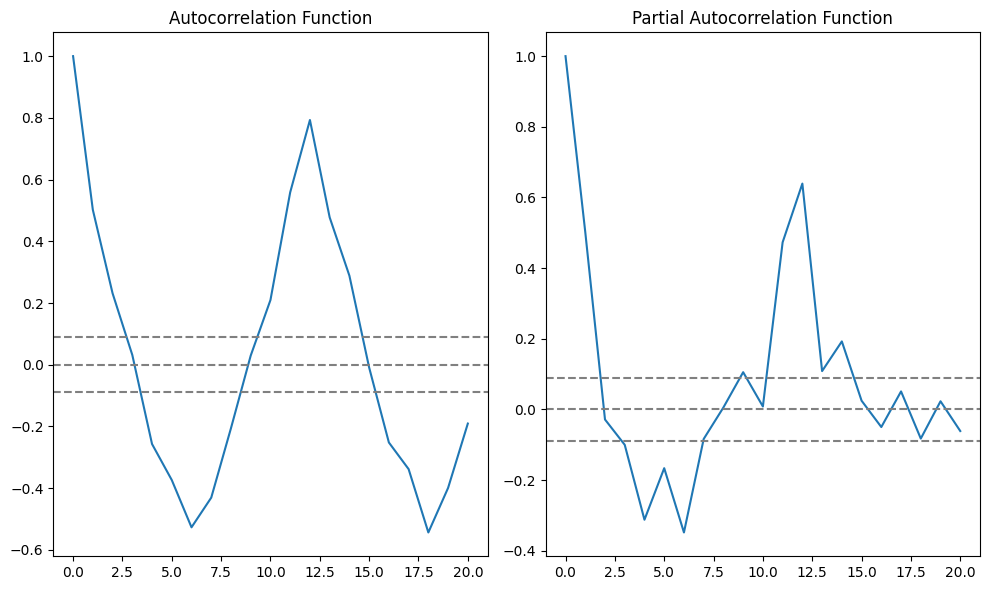

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1956-01-01    0.018675
1956-02-01    0.009311
1956-03-01    0.016983
1956-04-01    0.011172
1956-05-01   -0.068215
                ...   
1995-04-01    0.021547
1995-05-01   -0.069521
1995-06-01    0.023922
1995-07-01   -0.054351
1995-08-01   -0.089802
Length: 476, dtype: float64
RSS: 6.172848
Plotting AR Model


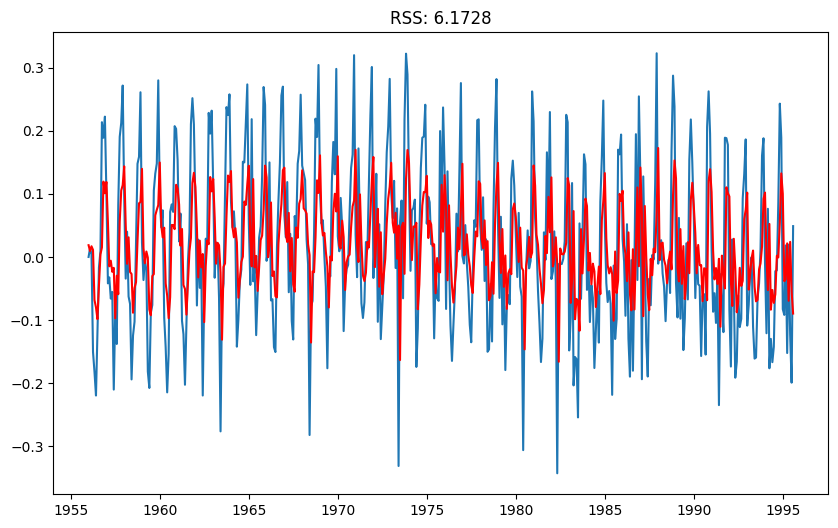

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting AR Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Month
1956-01-01    0.018705
1956-02-01    0.010474
1956-03-01    0.017761
1956-04-01    0.013005
1956-05-01   -0.059807
                ...   
1995-04-01    0.034233
1995-05-01   -0.058529
1995-06-01    0.020545
1995-07-01   -0.033538
1995-08-01   -0.084784
Length: 476, dtype: float64
RSS: 6.287416
Plotting Ma Model


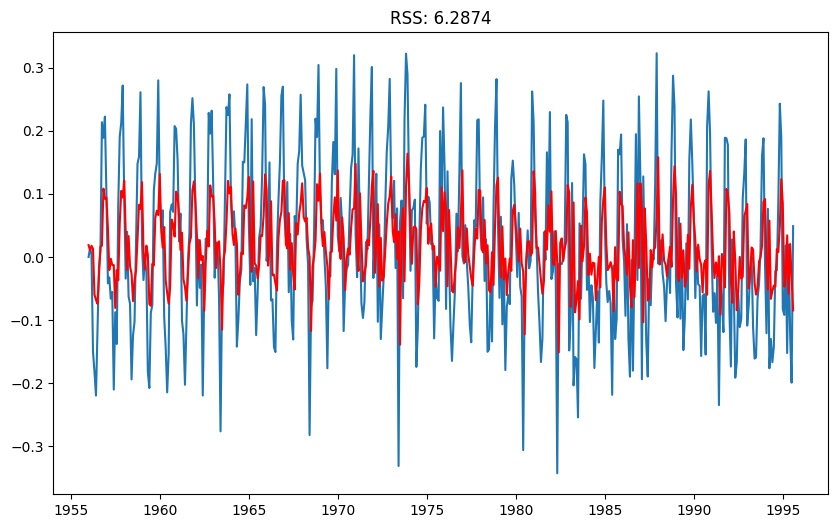

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting Ma Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Month
1956-01-01    0.018686
1956-02-01    0.015040
1956-03-01    0.015773
1956-04-01    0.015351
1956-05-01   -0.010985
                ...   
1995-04-01   -0.066628
1995-05-01   -0.107886
1995-06-01   -0.107912
1995-07-01   -0.075914
1995-08-01   -0.024793
Length: 476, dtype: float64
RSS: 3.953805
Plotting ARIMA Model


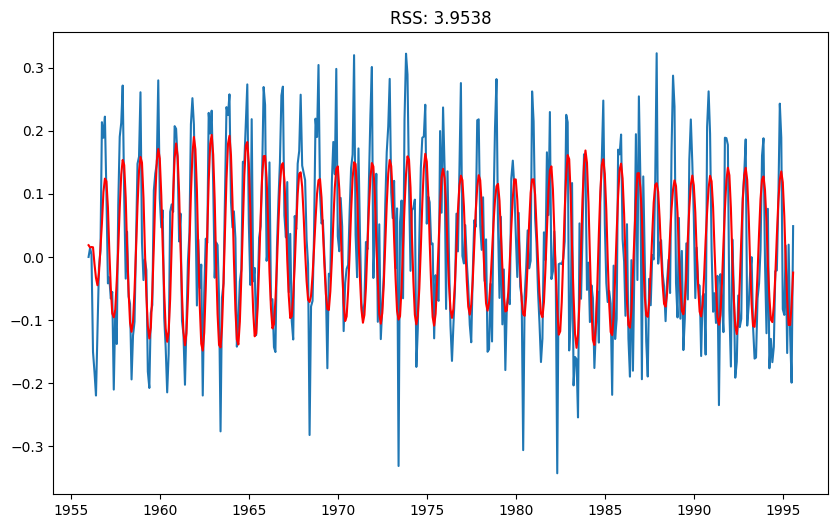

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting ARIMA Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011448
1956-04-01    0.002746
1956-05-01   -0.104201
                ...   
1995-04-01    0.010214
1995-05-01   -0.087226
1995-06-01    0.028880
1995-07-01   -0.087594
1995-08-01   -0.081532
Length: 476, dtype: float64
RSS: 6.123411
Plotting ARIMA Model


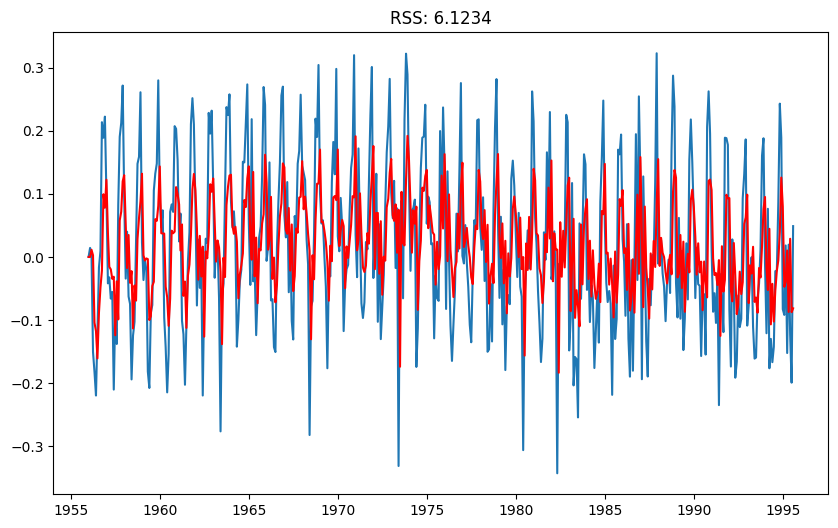

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting ARIMA Model")

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-651.710, Time=5.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-543.335, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-565.457, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-570.879, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-545.307, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-579.786, Time=2.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-581.082, Time=2.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-649.642, Time=3.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-650.199, Time=4.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-648.759, Time=1.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-646.408, Time=3.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-579.172, Time=2.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-645.848, Time=5.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-649.575, Time=1.27 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  476
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 331.855
Date:                Mon, 01 Apr 2024   AIC                           -651.710
Time:                        17:32:39   BIC                           -626.730
Sample:                    01-01-1956   HQIC                          -641.887
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      2.112      0.035     8.1e-05       0.002
ar.L1         -0.2925      0.123     -2.374      0.018      -0.534      -0.051
ar.L2          0.3674      0.091      4.023      0.000       0.188       0.546
ma.L1         -0.1007      0.104     -0.973      0.331      -0.304       0.102
ma.L2         -0.8118      0.102     -7.933      0.000      -1.012      -0.611
sigma2         0.0144      0.001     14.210      0.000       0.012       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.70   Prob(JB):                         0.28
Heteroskedasticity (H):               1.25   Skew:                            -0.13
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011688
1956-04-01    0.006479
1956-05-01   -0.125018
                ...   
1995-04-01   -0.116950
1995-05-01   -0.126565
1995-06-01   -0.061781
1995-07-01   -0.069387
1995-08-01   -0.057067
Length: 476, dtype: float64
RSS: 4.514865
Plotting ARIMA Model


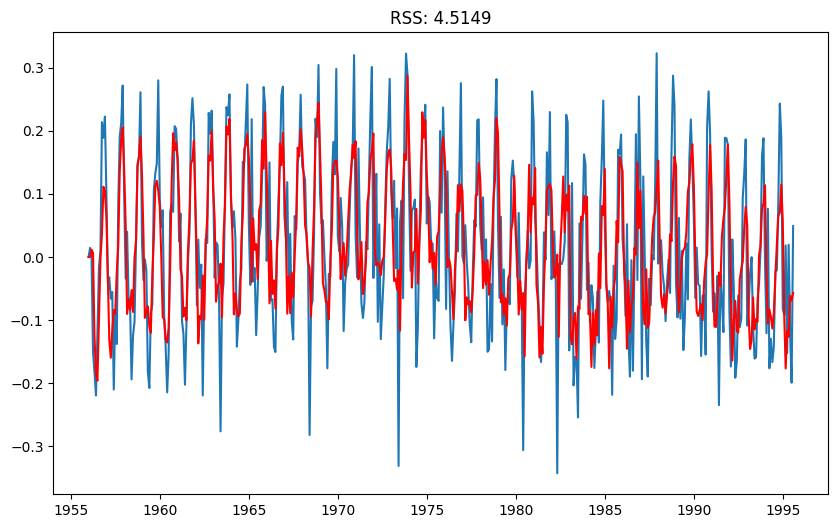

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting ARIMA Model")

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.012155
1956-05-01   -0.039074
1956-06-01   -0.059525
                ...   
1995-04-01   -0.062788
1995-05-01    0.071898
1995-06-01   -0.053990
1995-07-01    0.031826
1995-08-01    0.025523
Length: 475, dtype: float64
RSS: 7.375403
Plotting ARIMA Model


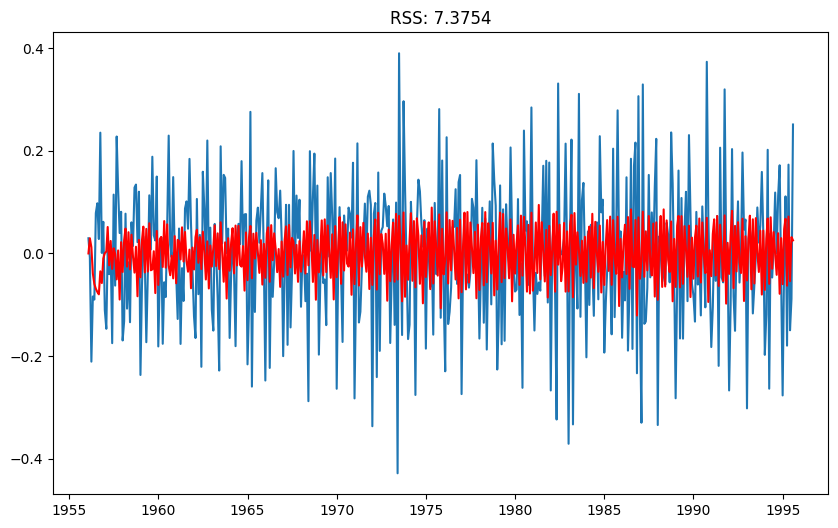

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Monthly beer production'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Monthly beer production'])**2))
print("Plotting ARIMA Model")

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.012155
1956-05-01   -0.039074
1956-06-01   -0.059525
dtype: float64


In [ ]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.041756
1956-05-01    0.002681
1956-06-01   -0.056843
dtype: float64


In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['Monthly beer production'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
1956-01-01    4.534748
1956-02-01    4.534748
1956-03-01    4.564348
1956-04-01    4.576503
1956-05-01    4.537429
dtype: float64

In [ ]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

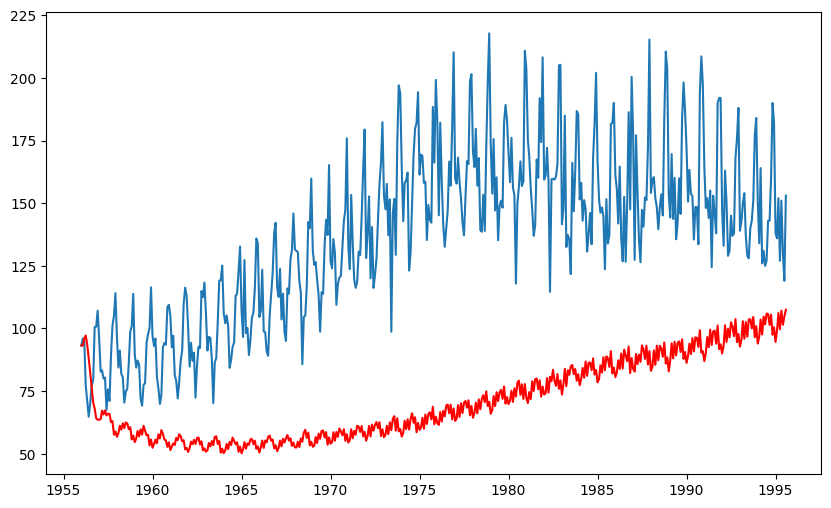

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

In [ ]:
# Check the dimension of the dataset
indexedDataset_logScale

,Monthly beer production
Month,
1956-01-01,4.534748
1956-02-01,4.564348
1956-03-01,4.555980
1956-04-01,4.345103
1956-05-01,4.261270
...,...
1995-04-01,4.844187
1995-05-01,5.017280
1995-06-01,4.867534


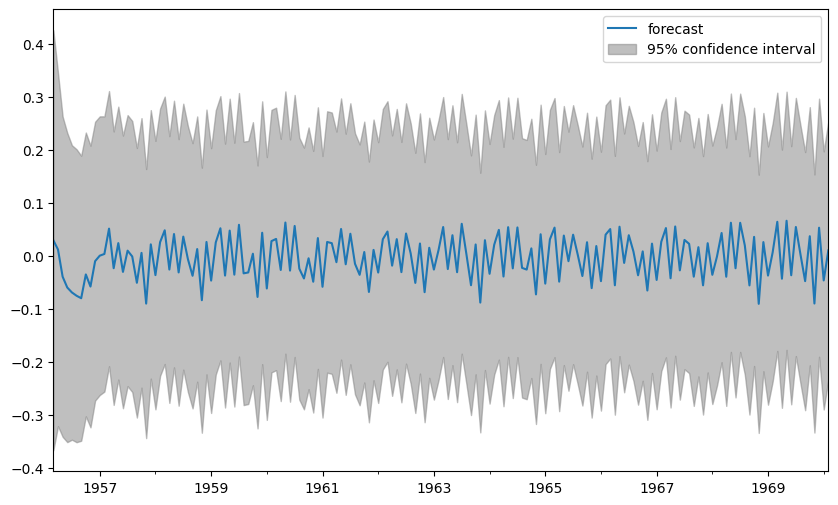

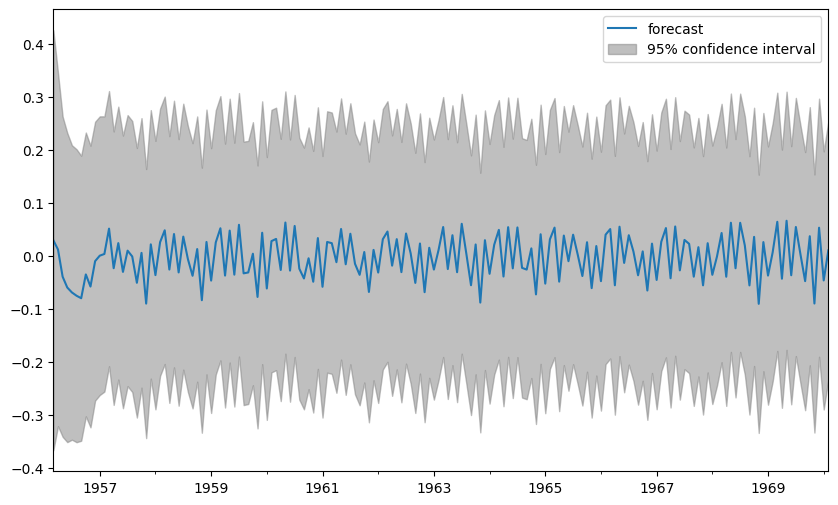

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

1995-09-01   -0.041351
1995-10-01    0.023039
1995-11-01   -0.059624
1995-12-01    0.062470
1996-01-01   -0.033726
1996-02-01    0.001142
1996-03-01    0.033339
1996-04-01   -0.055498
1996-05-01    0.066464
1996-06-01   -0.056224
1996-07-01    0.034321
1996-08-01    0.000187
1996-09-01   -0.031197
1996-10-01    0.057252
1996-11-01   -0.064538
1996-12-01    0.057958
1997-01-01   -0.032440
1997-02-01    0.001673
1997-03-01    0.032944
1997-04-01   -0.055294
1997-05-01    0.066244
1997-06-01   -0.056026
1997-07-01    0.034232
1997-08-01    0.000136
Freq: MS, Name: predicted_mean, dtype: float64

>Time Series using Facebook's Prophet

The Dataset consists of Hourly Energy Demand Met for a particular state (DL-KL) and it's weather condition for the duration of a month (Jan 2022).

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [ ]:
filename_DL = '/content/DL_Complete_Yearly_Demand_Profile_train.csv'
def read_data(filename):
  df = pd.read_csv(filename)
  df = df.drop('Unnamed: 0',axis =1)
  return df

df = read_data(filename_DL)
df.head()

,DateTime,State,Hourly Demand Met (in MW),Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2022-01-01,Delhi - 2022,2148.22,8,7 °C,93,CALM,0 km/h,0 km/h,992.62 hPa,0.0 mm,Fog
1,2022-01-01 01:00:00,Delhi - 2022,1863.54,8,7 °C,93,CALM,0 km/h,0 km/h,993.59 hPa,0.0 mm,Fog
2,2022-01-01 02:00:00,Delhi - 2022,1697.53,7,6 °C,93,CALM,0 km/h,0 km/h,993.59 hPa,0.0 mm,Fog
3,2022-01-01 03:00:00,Delhi - 2022,1593.03,7,6 °C,93,W,6 km/h,0 km/h,994.56 hPa,0.0 mm,Fog
4,2022-01-01 04:00:00,Delhi - 2022,1603.47,9,8 °C,93,W,6 km/h,0 km/h,994.56 hPa,0.0 mm,Fog


In [ ]:
def date_preprocessing(df):
  df = df.rename(columns={'DateTime': 'ds', 'Hourly Demand Met (in MW)': 'y'})

  df['y'] = pd.to_numeric(df['y'])
  df['ds'] = pd.to_datetime(df['ds'],format='ISO8601')
  return df

df = date_preprocessing(df)
df.head()

,ds,State,y,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2022-01-01 00:00:00,Delhi - 2022,2148.22,8,7 °C,93,CALM,0 km/h,0 km/h,992.62 hPa,0.0 mm,Fog
1,2022-01-01 01:00:00,Delhi - 2022,1863.54,8,7 °C,93,CALM,0 km/h,0 km/h,993.59 hPa,0.0 mm,Fog
2,2022-01-01 02:00:00,Delhi - 2022,1697.53,7,6 °C,93,CALM,0 km/h,0 km/h,993.59 hPa,0.0 mm,Fog
3,2022-01-01 03:00:00,Delhi - 2022,1593.03,7,6 °C,93,W,6 km/h,0 km/h,994.56 hPa,0.0 mm,Fog
4,2022-01-01 04:00:00,Delhi - 2022,1603.47,9,8 °C,93,W,6 km/h,0 km/h,994.56 hPa,0.0 mm,Fog


In [ ]:
def prophet_model_fit(df):
  m = Prophet()
  m.add_regressor('Temperature')
  m.add_regressor('Humidity')
  m.fit(df)

  temp = df['Temperature']
  humidity = df['Humidity']
  #Feed through weather API
  future_temp = np.random.uniform(9, 11, 72)
  future_temp = pd.Series(future_temp)

  temp_series = pd.concat([temp, future_temp], ignore_index=True)

  future_humidity = np.random.uniform(50, 100, 72)
  future_humidity = pd.Series(future_humidity)

  humidity_series = pd.concat([humidity, future_humidity], ignore_index=True)

  future = m.make_future_dataframe(periods=72,freq='H')

  future['Temperature'] = temp_series
  future['Humidity'] = humidity_series
  return m,future

m,future = prophet_model_fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeq4v_q79/9x23yeo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeq4v_q79/cf148tp3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78146', 'data', 'file=/tmp/tmpeq4v_q79/9x23yeo2.json', 'init=/tmp/tmpeq4v_q79/cf148tp3.json', 'output', 'file=/tmp/tmpeq4v_q79/prophet_model8mfrjtbc/prophet_model-20240320061002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
756,2022-02-03 13:00:00,4042.336330,3811.992425,4271.948390
757,2022-02-03 14:00:00,3734.570242,3495.748657,3971.964722
758,2022-02-03 15:00:00,3522.685487,3278.448512,3769.750287
759,2022-02-03 16:00:00,3447.394177,3234.102045,3688.739345
760,2022-02-03 17:00:00,3504.371359,3261.383413,3755.717827


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Humidity,Humidity_lower,Humidity_upper,Temperature,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01 00:00:00,3126.555826,2003.240693,2477.484667,3126.555826,3126.555826,0.268672,0.268672,0.268672,-19.430040,...,-19.161369,-19.161369,-19.161369,31.211034,31.211034,31.211034,0.0,0.0,0.0,2240.147600
1,2022-01-01 01:00:00,3124.381388,1689.423201,2178.496537,3124.381388,3124.381388,0.268672,0.268672,0.268672,-19.430040,...,-19.161369,-19.161369,-19.161369,9.484512,9.484512,9.484512,0.0,0.0,0.0,1931.136681
2,2022-01-01 02:00:00,3122.206950,1467.209810,1949.197253,3122.206950,3122.206950,0.268672,0.268672,0.268672,-23.528075,...,-23.259403,-23.259403,-23.259403,-12.737027,-12.737027,-12.737027,0.0,0.0,0.0,1703.299546
3,2022-01-01 03:00:00,3120.032512,1308.860128,1791.524221,3120.032512,3120.032512,0.268672,0.268672,0.268672,-23.528075,...,-23.259403,-23.259403,-23.259403,-35.329548,-35.329548,-35.329548,0.0,0.0,0.0,1556.162999
4,2022-01-01 04:00:00,3117.858074,1298.516375,1773.051398,3117.858074,3117.858074,0.268672,0.268672,0.268672,-15.332006,...,-15.063334,-15.063334,-15.063334,-58.165881,-58.165881,-58.165881,0.0,0.0,0.0,1529.274276


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast,)

The Hourly Demand met for Delhi peaks at 11:00 and is minumum around 4 in the morning, with the weekends showing a decline of upto 400MW an Hour compared to the avg HDM.

Using Kerala's Hourly demand met (in MW) for the Month of Jan 2022

In [ ]:
filename_KL = '/content/KL_Complete_Yearly_Demand_Profile_train.csv'
df = read_data(filename_KL)
df.head()

,DateTime,State,Hourly Demand Met (in MW),Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2022-01-01 01:00:00,Kerala - 2022,2769.91,24,21 °C,83,CALM,0 km/h,0 km/h,"1,001.04 hPa",0.0 mm,Fair
1,2022-01-01 02:00:00,Kerala - 2022,2695.07,23,21 °C,88,ENE,9 km/h,0 km/h,"1,002.03 hPa",0.0 mm,Fair
2,2022-01-01 03:00:00,Kerala - 2022,2615.97,25,21 °C,78,E,9 km/h,0 km/h,"1,002.03 hPa",0.0 mm,Fair
3,2022-01-01 04:00:00,Kerala - 2022,2591.99,27,21 °C,70,E,9 km/h,0 km/h,"1,003.02 hPa",0.0 mm,Fair
4,2022-01-01 05:00:00,Kerala - 2022,2596.73,29,22 °C,66,E,6 km/h,0 km/h,993.14 hPa,0.0 mm,Fair


In [ ]:
df = date_preprocessing(df)
df.head()

,ds,State,y,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2022-01-01 01:00:00,Kerala - 2022,2769.91,24,21 °C,83,CALM,0 km/h,0 km/h,"1,001.04 hPa",0.0 mm,Fair
1,2022-01-01 02:00:00,Kerala - 2022,2695.07,23,21 °C,88,ENE,9 km/h,0 km/h,"1,002.03 hPa",0.0 mm,Fair
2,2022-01-01 03:00:00,Kerala - 2022,2615.97,25,21 °C,78,E,9 km/h,0 km/h,"1,002.03 hPa",0.0 mm,Fair
3,2022-01-01 04:00:00,Kerala - 2022,2591.99,27,21 °C,70,E,9 km/h,0 km/h,"1,003.02 hPa",0.0 mm,Fair
4,2022-01-01 05:00:00,Kerala - 2022,2596.73,29,22 °C,66,E,6 km/h,0 km/h,993.14 hPa,0.0 mm,Fair


In [ ]:
m,future = prophet_model_fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeq4v_q79/k5u0a91h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeq4v_q79/ria7ts7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9153', 'data', 'file=/tmp/tmpeq4v_q79/k5u0a91h.json', 'init=/tmp/tmpeq4v_q79/ria7ts7z.json', 'output', 'file=/tmp/tmpeq4v_q79/prophet_modeld8i78sio/prophet_model-20240320061003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
745,2022-02-03 13:00:00,3076.350327,2925.586301,3230.387972
746,2022-02-03 14:00:00,3140.156873,2981.152034,3293.089233
747,2022-02-03 15:00:00,3128.276367,2968.577558,3280.675870
748,2022-02-03 16:00:00,3176.460833,3023.284923,3328.507676
749,2022-02-03 17:00:00,3131.170633,2975.415245,3288.154479


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast,)

The Hourly Demand met for Kerala peaks at 8 in the evening and is minumum around 4 in the morning, with the weekends showing a similar decline of upto 250MW an Hour compared to the avg HDM.

>Using ARIMA